In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import spermBank as sbnk
import seaborn as sns
# from bs4 import BeautifulSoup as bs

%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load search categories from search page for looping

In [42]:
url_ = 'https://www.donorsiblingregistry.com/members/search'

In [43]:
idDict = sbnk.find_form_ids_facil(sbnk.html_to_soup(sbnk.open_url(url_)))

In [44]:
# for k in idDict.keys(): print(k)

# for z in zip(idDict['search_donortype']['id'], idDict['search_donortype']['names']): 
#     print(z)

# for z in zip(idDict['search_facilityid']['id'], idDict['search_facilityid']['names']): 
#     if 'Ann Arbor' in z[1]:
#         print(z)

# Scrape original sperm banks

In [45]:
# banks included in the original analysis
bankids=['39','38','6','11','907','13','65','15','3','28','40','45','41','36',
         '120','123','18','37','81','12','533','48','31','5','94','922','110',
         '588','65045','192','355','85','42']

bankabbrev=['ReproRes','Reprolab','Biogenetics','Cryobio','BosIVF','Cryogen','Xytex','Fairfax',
            'CCB','NECC','Repromed','TSBC','RochReg','ProTech','Valley','CryosNY','Follas',
            'RepGerm','IntCryo','CryogamCO','FertFirst','Tyler','NWCryo','AnnArbor','Midwest',
            'ESB','HC','AndroNW','GG','GeorgiaRS','FINO','EBMC','RMC']

In [116]:
# load bank ids for sperm donors
orig_meta_df, orig_df = sbnk.load_multi_bank(bankids, '1')

https://donorsiblingregistry.com/members/ListRegistry?keyword=&dtDonorYear=&dtDonorMonth=&dtDonorDay=&dpTypeID=1&dpIdentityNumber=&faID=39&usUserName_startswith=&usTypeID=&faCity_contains=&faStateID=&faCountryID=&dpDateCreated_isgreaterthan=&doSearch=Search+Registry&userBrowse=1&userSearch=1&
Reproductive Resources , id:  39
49
https://donorsiblingregistry.com/members/ListRegistry?keyword=&dtDonorYear=&dtDonorMonth=&dtDonorDay=&dpTypeID=1&dpIdentityNumber=&faID=38&usUserName_startswith=&usTypeID=&faCity_contains=&faStateID=&faCountryID=&dpDateCreated_isgreaterthan=&doSearch=Search+Registry&userBrowse=1&userSearch=1&
Repro Lab, Inc. , id:  38
89
https://donorsiblingregistry.com/members/ListRegistry?keyword=&dtDonorYear=&dtDonorMonth=&dtDonorDay=&dpTypeID=1&dpIdentityNumber=&faID=6&usUserName_startswith=&usTypeID=&faCity_contains=&faStateID=&faCountryID=&dpDateCreated_isgreaterthan=&doSearch=Search+Registry&userBrowse=1&userSearch=1&
Biogenetics , id:  6
90
https://donorsiblingregistry.c

In [117]:
indiv_df = sbnk.make_indiv_df(orig_df)

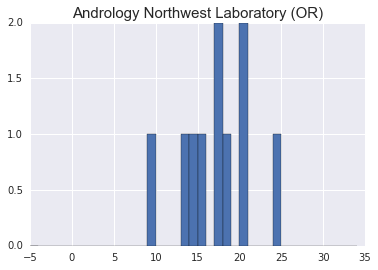

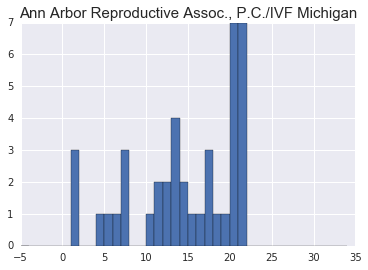

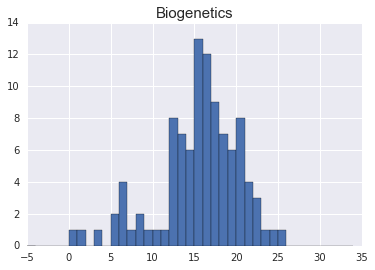

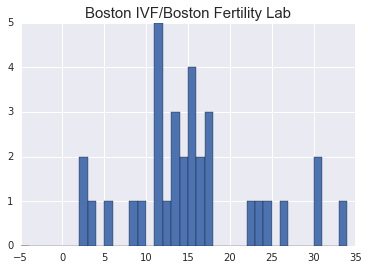

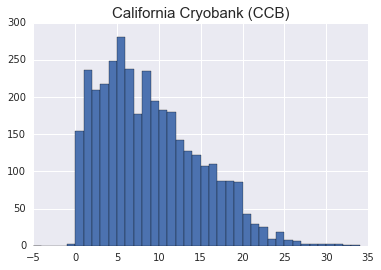

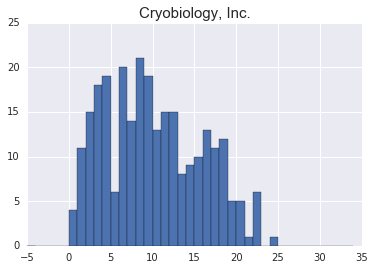

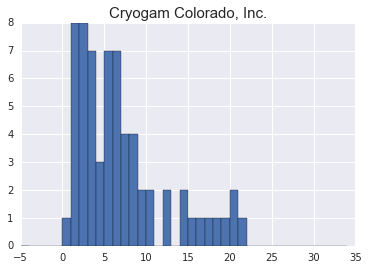

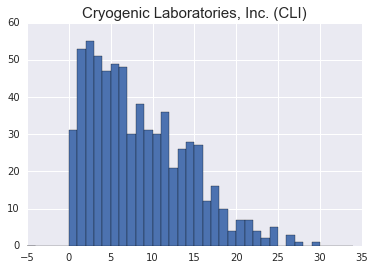

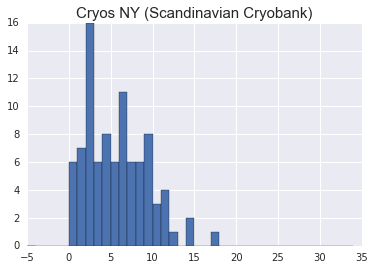

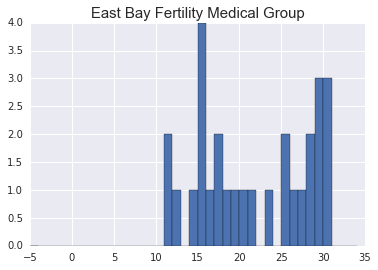

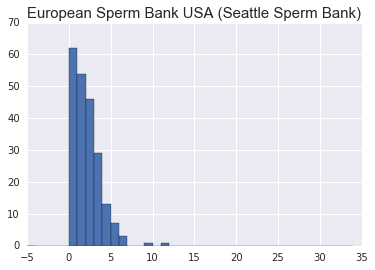

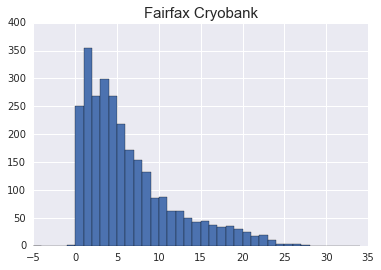

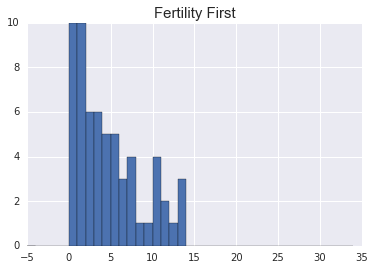

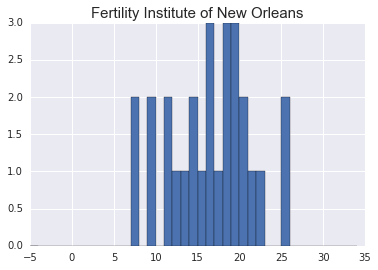

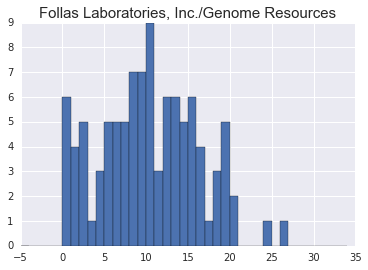

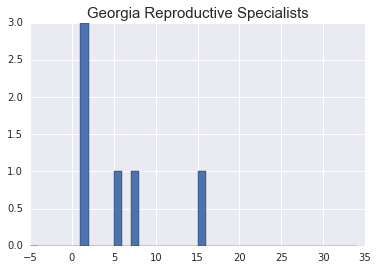

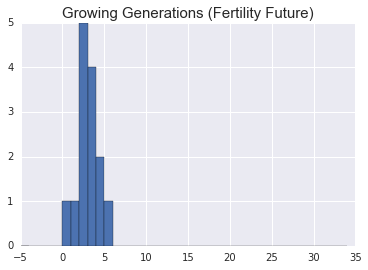

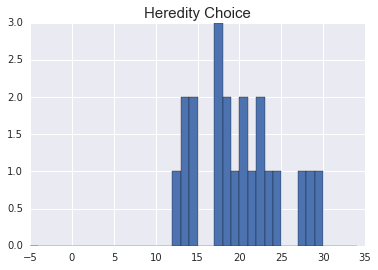

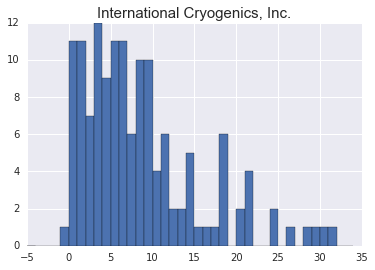

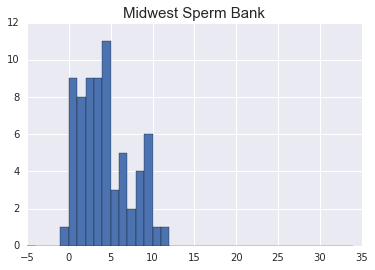

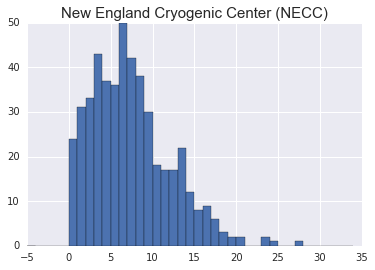

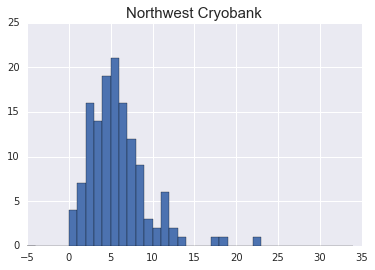

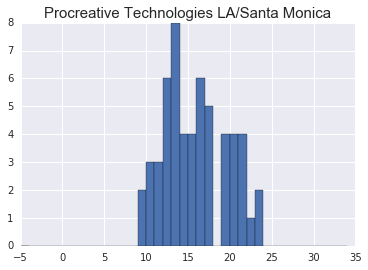

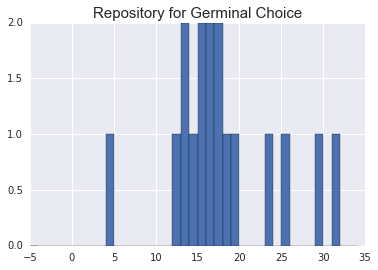

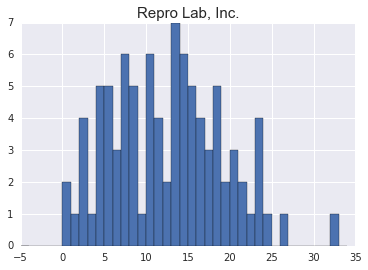

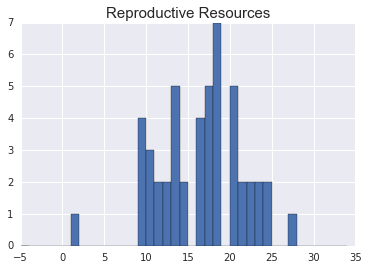

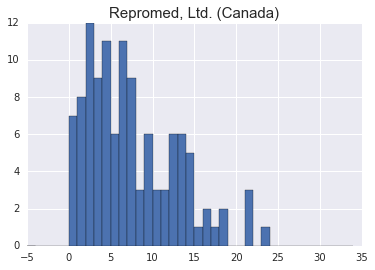

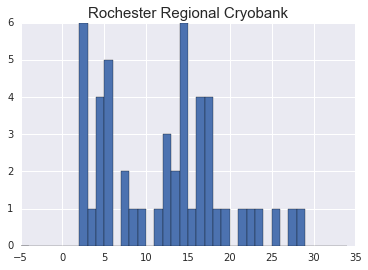

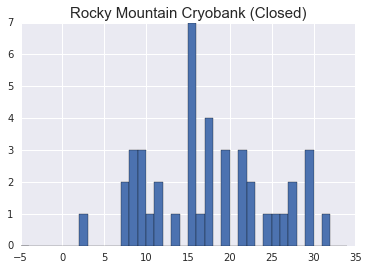

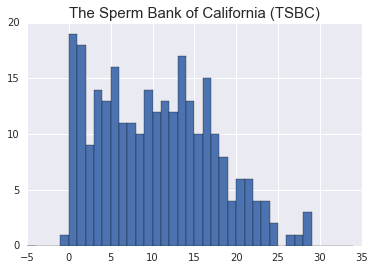

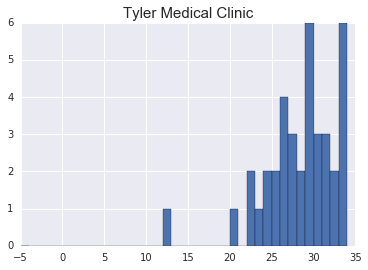

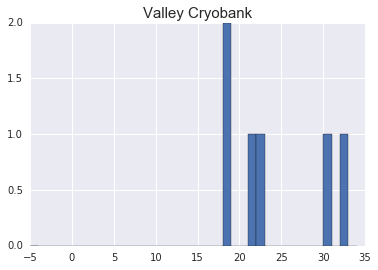

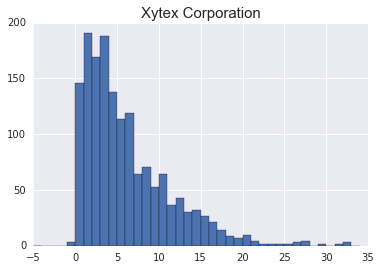

In [142]:
for b in sorted(list(set(indiv_df['bankname']))):
    A = indiv_df[indiv_df['bankname']==b]['post_age']
    plt.hist(A[~pd.isnull(A)], bins=range(-5, 35))
    plt.title(b, fontsize=15)
    plt.show()

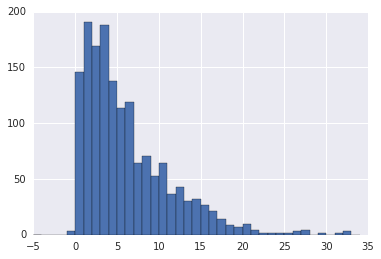

In [140]:
plt.hist(list(A[~pd.isnull(A)]), bins=range(-5,35))
plt.show()

# Scrape multiple sperm banks

In [ ]:
# load bank ids for sperm donors
bank_meta_df, bank_df = sbnk.load_multi_bank(idDict['search_facilityid']['id'][1:], '1')

In [ ]:
indiv_df = sbnk.make_indiv_df(bank_df)

In [ ]:
bank_meta_df.to_csv('ScrapedDSRdata/2017_02_17_bankinfo_spermdonors.csv', sep='|', header=True)
bank_df.to_csv('ScrapedDSRdata/2017_02_17_spermdonors.csv', sep='|', header=True)
indiv_df.to_csv('ScrapedDSRdata/2017_02_17_spermdonors_indiv.csv', sep='|', header=True)

# Scrape egg donations

In [ ]:
# load bank ids for sperm donors
bank_meta_df, bank_df = sbnk.load_multi_bank(idDict['search_facilityid']['id'][1:], '2')

In [ ]:
indiv_df = sbnk.make_indiv_df(bank_df)

In [ ]:
bank_meta_df.to_csv('ScrapedDSRdata/2017_02_17_bankinfo_eggdonors.csv', sep='|', header=True)
bank_df.to_csv('ScrapedDSRdata/2017_02_17_eggdonors.csv', sep='|', header=True)
indiv_df.to_csv('ScrapedDSRdata/2017_02_17_eggdonors_indiv.csv', sep='|', header=True)

# Scrape embryo donations

In [ ]:
# load bank ids for sperm donors
# bank_meta_df, bank_df = load_multi_bank(idDict['search_facilityid']['id'][1:], '3')
bank_meta_df = sbnk.load_multi_bank(idDict['search_facilityid']['id'][1:], '3')

In [ ]:
indiv_df = sbnk.make_indiv_df(bank_df)

In [ ]:
bank_meta_df.to_csv('DSRdata/2017_02_17_bankinfo_embryodonors.csv', sep='|', header=True)
bank_df.to_csv('DSRdata/2017_02_17_embryodonors.csv', sep='|', header=True)
indiv_df.to_csv('DSRdata/2017_02_17_embryodonors_indiv.csv', sep='|', header=True)